<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Visualizing the Confusion Matrix, ROC Curve, and Precision-Recall Curve

_Authors: Kiefer Katovich (SF)_

---

The interactive visualization below allows you to observe how the confusion matrix, ROC curve, and precision-recall curve interact with one another. 

The model is a logistic regression fit on the cancer versus healthy data. The raw data points are shown, along with the prediction curve (right panel). 

You can change the threshold and observe how it affects the confusion matrix, as well as where that threshold is on the corresponding ROC or precision-recall curve (left panel). 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

**The visualization allows you to change three variables:**
- **Spread**: The dispersion of the data (impacts the signal and how well the classifier can discriminate between the points).
- **Threshold**: The decision threshold for labeling 1 versus 0.
- **Cancer %**: The number of data points that are cancerous versus healthy. This helps show the effect of class imbalance on classifier performance and metrics.

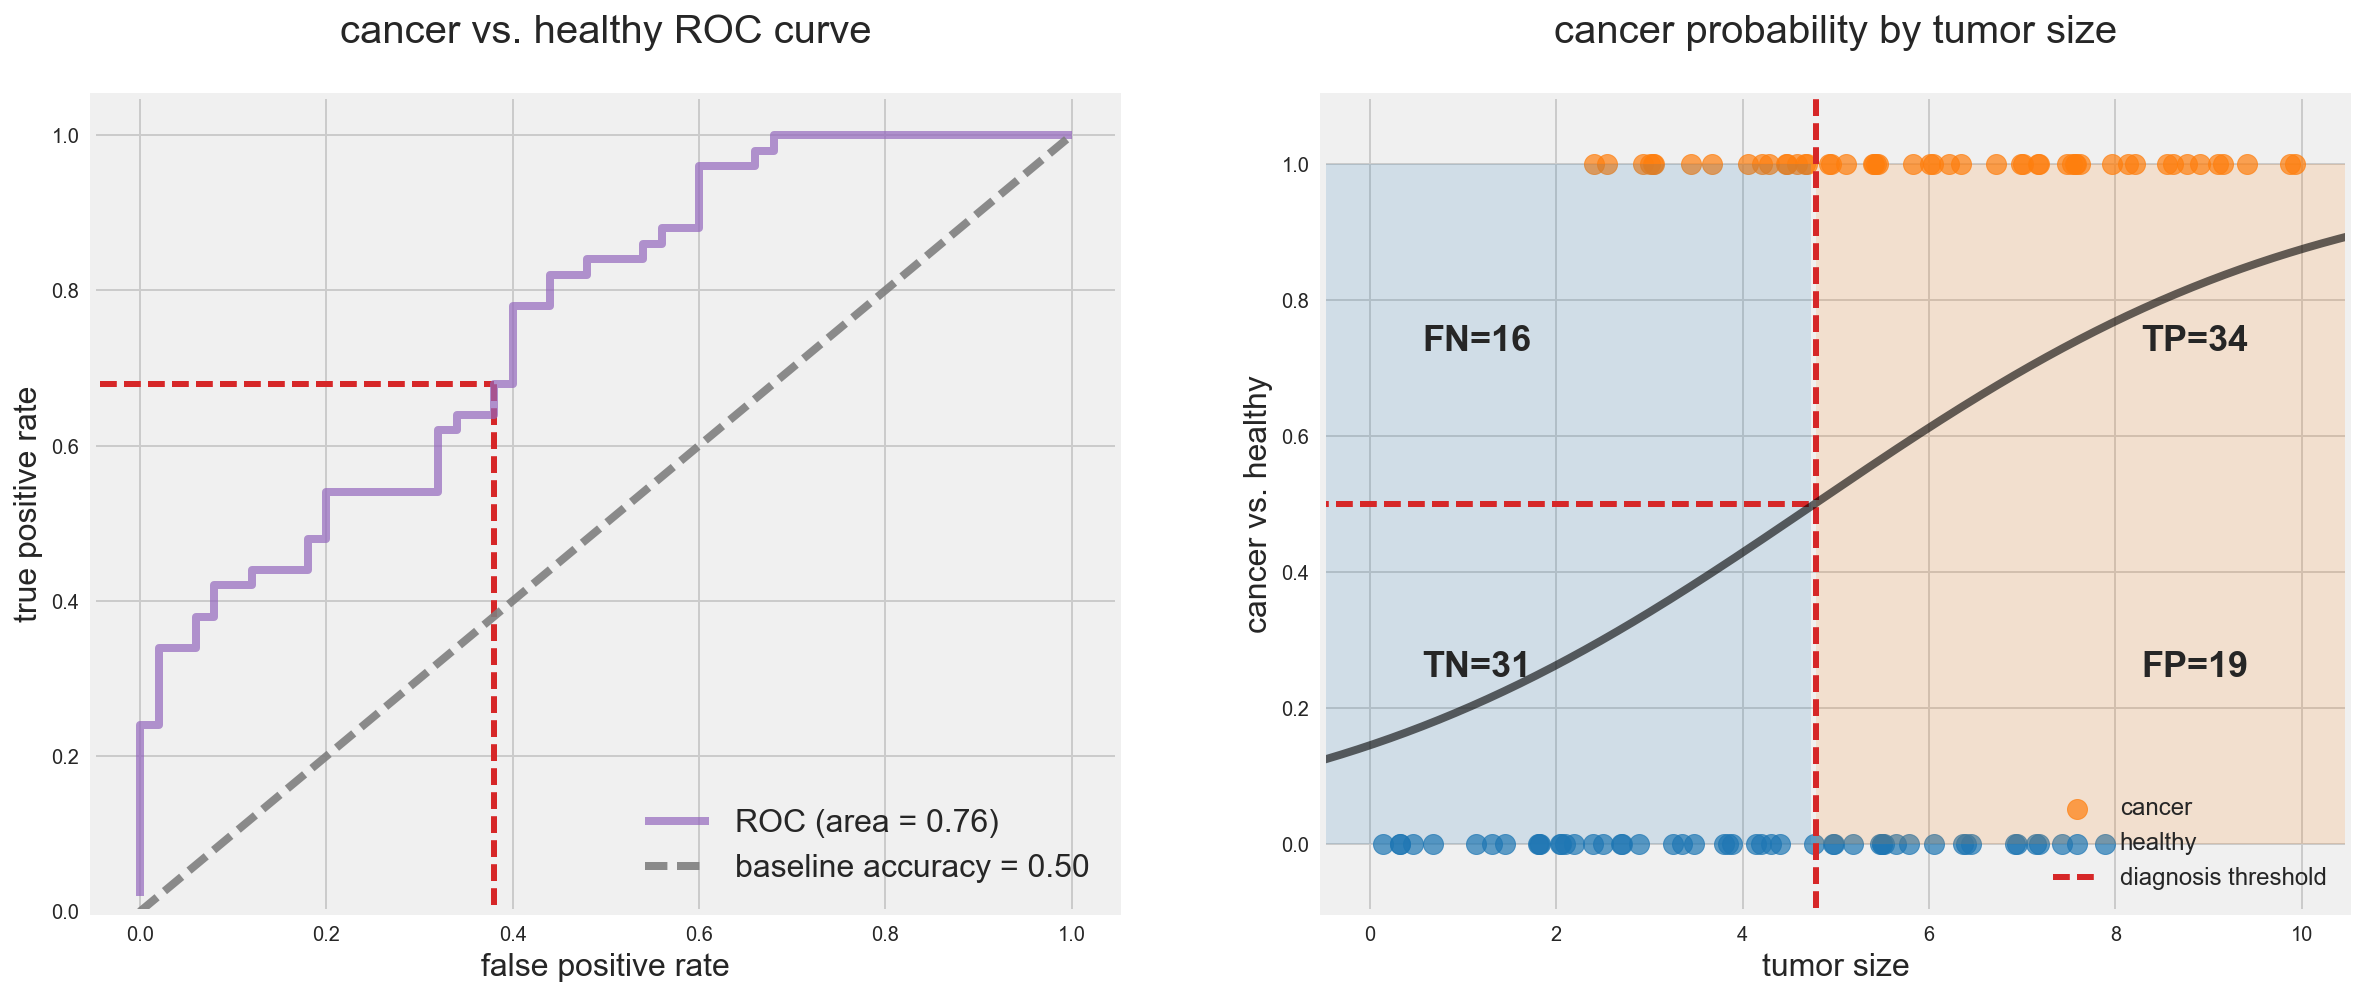

In [2]:
import imp
plotter = imp.load_source('plotter', './plotting-code/roc_plotter.py')
from plotter import ROCLogisticPlotter

roc_plotter = ROCLogisticPlotter()
roc_plotter.preconstruct_data()
roc_plotter.roc_interact()

---

### Relevant Classification Metrics

This reference table describes some of the important metrics displayed in the visual below.

|   |   |
|---|---|
|**TPR/RECALL**    | The true positive rate, also known as the **sensitivity** or **recall**, is the ability of the classifier to correctly identify a class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations of the class. A recall of 0 means the classifier predicted all observations of the current class incorrectly.|
|**FPR** | The false positive rate is the percent of times the model incorrectly predicts 1 when the class is actually 0. This is the x-axis on the ROC curve.<br><br> `fpr = fp / (tn + fp)`<br><br>|
|**PRECISION** | Precision is the ability of the classifier to avoid incorrectly labeling a class as a member of another class. <br><br> `Precision = True Positives / (True Positives + False Positives)`<br><br>_A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class. A precision score of 0 would mean that the classifier misclassified every instance of the current class. |
|**RECALL**    | Recall is the ability of the classifier to correctly identify the current class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations of the class. A recall of 0 means the classifier predicted all observations of the current class incorrectly.|
|**AUC** | The area under the curve can refer to either the ROC curve or the precision-recall curve. In the case of the ROC curve, an area of 0.50 is the baseline, meaning this is the area under the curve when the classifier would be predicting at chance. An AUC of 1.0 is a perfect model, where the classifier never makes a mistake. <br><br>|

In [3]:
from sklearn.metrics import classification_report

In [4]:
print classification_report(roc_plotter.currents['y_true'], roc_plotter.currents['y_pred'])

             precision    recall  f1-score   support

        0.0       0.66      0.62      0.64        50
        1.0       0.64      0.68      0.66        50

avg / total       0.65      0.65      0.65       100

